Avocado Prices Dataset Analysis

It's no secret that avocados are a staple of Millennial diets, often paired with the ever-popular avocado toast. While there's plenty of talk about how much Millennials love avocados, it raises a curious question: could avocado prices be influencing other major life decisions?

This repository explores avocado price trends across different regions, potentially uncovering where the cheapest avocados can be found. After all, if finding affordable avocados helps Millennials save money, maybe the "American Dream" of homeownership is within reach!

Objective

By analyzing the dataset, we aim to uncover insights into avocado pricing trends, variations across regions, and possible correlations with consumption habits. This could provide useful insights for businesses, consumers, or anyone curious about the influence of avocado prices.

# Initialization

In [ ]:
# Install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=a0418416bb9789f6c5b47ebaf6d53397999b344d75a1e138d0f39177b7396294
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


# Spark Context

In [ ]:
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName('dibimbing').setMaster('local[*]')
sc = SparkContext.getOrCreate(conf=conf)
sc

<SparkContext master=local[*] appName=dibimbing>

In [ ]:
type(sc)

pyspark.context.SparkContext

In [ ]:
sc.defaultParallelism

2

In [ ]:
sc.version

'3.5.2'

In [ ]:
sc.getConf().getAll()

[('spark.app.submitTime', '1726145493327'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'dibimbing'),
 ('spark.app.id', 'local-

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read CSV files
raw_data = pd.read_csv('/content/drive/MyDrive/avocado.csv')

In [ ]:
raw_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Define the column names
column_names = ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large eBags', 'XLarge Bags', 'type', 'year', 'region']

# Create the DataFrame from raw data
# Assuming raw_data is already defined as a list of lists or tuples
avocado_pd = pd.DataFrame(raw_data, columns=column_names)

# Convert the 'Date' column to datetime format
avocado_pd['Date'] = pd.to_datetime(avocado_pd['Date'], format="%Y-%m-%d")

# Check the data types of the DataFrame
avocado_pd.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large eBags,float64


In [ ]:
raw_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
avocado_pd[avocado_pd["XLarge Bags"] > 2].head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large eBags,XLarge Bags,type,year,region
24,24,2015-07-12,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,NaN,33.33,conventional,2015,Albany
38,38,2015-04-05,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,NaN,104.17,conventional,2015,Albany
54,2,2015-12-13,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,NaN,13.53,conventional,2015,Atlanta
55,3,2015-12-06,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,NaN,2.71,conventional,2015,Atlanta
56,4,2015-11-29,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,NaN,24.41,conventional,2015,Atlanta


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("ExampleApp") \
    .getOrCreate()

In [ ]:
# Read the data into Spark DataFrame
# Create a DataFrame from the mockup data
spark_df = spark.createDataFrame(raw_data, column_names)

# Selecting columns
spark_selected = spark_df.select('region', 'AveragePrice')
spark_selected.show()

+------+------------+
|region|AveragePrice|
+------+------------+
|Albany|        1.33|
|Albany|        1.35|
|Albany|        0.93|
|Albany|        1.08|
|Albany|        1.28|
|Albany|        1.26|
|Albany|        0.99|
|Albany|        0.98|
|Albany|        1.02|
|Albany|        1.07|
|Albany|        1.12|
|Albany|        1.28|
|Albany|        1.31|
|Albany|        0.99|
|Albany|        1.33|
|Albany|        1.28|
|Albany|        1.11|
|Albany|        1.07|
|Albany|        1.34|
|Albany|        1.33|
+------+------------+
only showing top 20 rows



In [ ]:
# Filtering rows
spark_filtered = spark_df.where(spark_df['AveragePrice'] > 3)
spark_filtered.show()

+----------+----------+------------+------------+-------+--------+------+----------+----------+-----------+-----------+-------+----+-----------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|    4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|   type|year|           region|
+----------+----------+------------+------------+-------+--------+------+----------+----------+-----------+-----------+-------+----+-----------------+
|        12|2016-10-02|        3.03|     3714.71| 296.71|  2699.8|   0.0|     718.2|     718.2|        0.0|        0.0|organic|2016|         LasVegas|
|         7|2016-11-06|        3.12|     19043.8|5898.49|10039.34|   0.0|   3105.97|    3079.3|      26.67|        0.0|organic|2016|     SanFrancisco|
|         8|2016-10-30|        3.25|    16700.94|2325.93|11142.85|   0.0|   3232.16|   3232.16|        0.0|        0.0|organic|2016|     SanFrancisco|
|        42|2017-03-12|        3.05|     2068.26|1043.83|   77.36|   0.0|    947.07|    926.67

In [ ]:
# Grouping and aggregating
spark_aggregated = spark_df.groupBy('region').agg({'AveragePrice': 'sum', 'Total Volume':'sum', 'Total Bags':'sum'})
spark_aggregated.show()

+------------------+--------------------+--------------------+------------------+
|            region|     sum(Total Bags)|   sum(Total Volume)| sum(AveragePrice)|
+------------------+--------------------+--------------------+------------------+
|     PhoenixTucson| 3.890823629999998E7|1.9564331249999994E8| 413.8600000000001|
|       GrandRapids|   9169093.949999997|3.0211735929999992E7|508.68999999999994|
|     SouthCarolina|1.8153173780000005E7| 6.075377290000002E7|474.31000000000023|
|           TotalUS|1.6386007799499993E9| 5.864740181800001E9|445.83000000000027|
|  WestTexNewMexico|       3.529651553E7|1.4452183978000003E8|422.66999999999996|
|        Louisville|   6635288.779999999|1.6097002399999999E7| 434.9000000000001|
|      Philadelphia|2.3875232249999993E7|       7.183879818E7|            551.66|
|        Sacramento|   8982268.120000003| 7.516374685999995E7|            548.09|
|     DallasFtWorth|4.6469752550000004E7|2.0841928655000004E8|366.92999999999995|
|      Indianapo

In [ ]:
from pyspark.sql.functions import desc

# Sorting the DataFrame in descending order by 'Total Bags'
spark_sorted = spark_df.sort(desc('Total Bags'))
spark_sorted.show()

+----------+----------+------------+-------------+-------------+-------------+----------+-------------+-------------+-----------+-----------+------------+----+-------+
|Unnamed: 0|      Date|AveragePrice| Total Volume|         4046|         4225|      4770|   Total Bags|   Small Bags|Large eBags|XLarge Bags|        type|year| region|
+----------+----------+------------+-------------+-------------+-------------+----------+-------------+-------------+-----------+-----------+------------+----+-------+
|         7|2018-02-04|        0.87|6.250564652E7| 2.16201809E7|2.044550103E7|1066830.22|1.937313437E7| 1.33845868E7| 5719096.61|  269450.96|conventional|2018|TotalUS|
|         0|2018-03-25|        1.03|4.340983575E7| 1.41307991E7|1.212571142E7| 758801.12|1.639452411E7|1.254032719E7| 3544729.39|  309467.53|conventional|2018|TotalUS|
|        47|2017-02-05|        0.77| 6.10344571E7|2.274361617E7|2.032816155E7|1664383.09|1.629829629E7|1.256715558E7| 3618270.75|  112869.96|conventional|2017|T

In [ ]:
# Aggregating functions
spark_aggregated_func = spark_df.agg({'Total Bags': 'sum', 'AveragePrice': 'mean'})
spark_aggregated_func.show()

+-------------------+-----------------+
|    sum(Total Bags)|avg(AveragePrice)|
+-------------------+-----------------+
|4.373175798390006E9|1.405978409775878|
+-------------------+-----------------+



In [ ]:
# Applying user-defined functions
spark_df = spark_df.withColumn('total_price', spark_df['Total Bags'] * spark_df['AveragePrice'])
spark_df.show()

+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|     4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|region|       total_price|
+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+
|         0|2015-12-27|        1.33|    64236.62|1036.74| 54454.85| 48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|Albany|11566.837100000002|
|         1|2015-12-20|        1.35|    54876.98| 674.28| 44638.81| 58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|Albany|         12832.506|
|         2|2015-12-13|        0.93|   118220.22|  794.7|109149.67| 130.5|   8145.35|   8042.21|     103.14|        0.0|conventional|2015|Albany|         7575.1755|
|         

In [ ]:
# Joining DataFrames
df1 = spark_df.select('Unnamed: 0', 'region')
df2 = spark_df.select('Unnamed: 0', 'Total Volume')
spark_joined = df1.join(df2, on='Unnamed: 0', how="inner")
spark_joined.show()

+----------+-----------------+------------+
|Unnamed: 0|           region|Total Volume|
+----------+-----------------+------------+
|        26| WestTexNewMexico|    89534.81|
|        26|             West|    89534.81|
|        26|          TotalUS|    89534.81|
|        26|            Tampa|    89534.81|
|        26|         Syracuse|    89534.81|
|        26|          StLouis|    89534.81|
|        26|          Spokane|    89534.81|
|        26|        Southeast|    89534.81|
|        26|     SouthCentral|    89534.81|
|        26|    SouthCarolina|    89534.81|
|        26|          Seattle|    89534.81|
|        26|     SanFrancisco|    89534.81|
|        26|         SanDiego|    89534.81|
|        26|       Sacramento|    89534.81|
|        26|          Roanoke|    89534.81|
|        26|  RichmondNorfolk|    89534.81|
|        26|RaleighGreensboro|    89534.81|
|        26|         Portland|    89534.81|
|        26|           Plains|    89534.81|
|        26|       Pittsburgh|  

In [ ]:
# Union DataFrames
df1 = spark_df.where(spark_df['Unnamed: 0']<3)
df2 = spark_df.where(spark_df['Unnamed: 0']>24)
spark_union = df1.unionAll(df2)
spark_union.show()

+----------+----------+------------+------------+----------+----------+---------+----------+----------+-----------+-----------+------------+----+-------------------+------------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|      4046|      4225|     4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|             region|       total_price|
+----------+----------+------------+------------+----------+----------+---------+----------+----------+-----------+-----------+------------+----+-------------------+------------------+
|         0|2015-12-27|        1.33|    64236.62|   1036.74|  54454.85|    48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|             Albany|11566.837100000002|
|         1|2015-12-20|        1.35|    54876.98|    674.28|  44638.81|    58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|             Albany|         12832.506|
|         2|2015-12-13|        0.93|   118220.22|     794.7| 109149.67|    

In [ ]:
# Now what if i want to label volume_type, < 107,376.8 small, 107,376.8- 432,962.3 medium, and > 432,962.3 large ?
from pyspark.sql import functions as F

df1 = spark_df.where(spark_df['Total Volume']<107376.8)
df2 = spark_df.where(spark_df['Unnamed: 0']>24)

In [ ]:
import pyspark.sql.functions as F

spark_df.withColumn(
    "volume_type",
    F.when(F.col("Total Volume") < 107376.8, "Small Volume")
    .when((F.col("Total Volume") >= 107376.8) & (F.col("Total Volume") <= 432962.3), "Medium Volume")
    .when(F.col("Total Volume") > 432962.3, "Large Volume")
    .otherwise(None)
).show()

+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+-------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|     4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|region|       total_price|  volume_type|
+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+-------------+
|         0|2015-12-27|        1.33|    64236.62|1036.74| 54454.85| 48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|Albany|11566.837100000002| Small Volume|
|         1|2015-12-20|        1.35|    54876.98| 674.28| 44638.81| 58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|Albany|         12832.506| Small Volume|
|         2|2015-12-13|        0.93|   118220.22|  794.7|109149.67| 130.5|   8145.35|   8042.21|     103.

# SQL

In [ ]:
# Register the DataFrame as a temporary table/view
(
  spark_df
 .createOrReplaceTempView("avocado")
)

In [ ]:
spark.sql(
    """
    WITH cte_avocado AS (
        SELECT
            *,
            CASE
                WHEN `Total Volume` <= 107376.8 THEN 'Small Volume'
                WHEN `Total Volume` > 107376.8 AND `Total Volume` <= 432962.3 THEN 'Medium Volume'
                WHEN `Total Volume` > 432962.3 THEN 'Large Volume'
                ELSE 'None'
            END AS volume_type
        FROM avocado
    )
    SELECT *
    FROM cte_avocado
    WHERE volume_type = 'Small Volume'
    """
).show()


+----------+----------+------------+------------+-------+--------+------+----------+----------+-----------+-----------+------------+----+------+------------------+------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|    4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|region|       total_price| volume_type|
+----------+----------+------------+------------+-------+--------+------+----------+----------+-----------+-----------+------------+----+------+------------------+------------+
|         0|2015-12-27|        1.33|    64236.62|1036.74|54454.85| 48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|Albany|11566.837100000002|Small Volume|
|         1|2015-12-20|        1.35|    54876.98| 674.28|44638.81| 58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|Albany|         12832.506|Small Volume|
|         3|2015-12-06|        1.08|    78992.15| 1132.0|71976.41| 72.58|   5811.16|    5677.4|     133.76|        

In [ ]:
from pyspark.sql.functions import expr

(
    spark_df
    .withColumn("volume_type", expr(
        """
        CASE
          WHEN `Total Volume` <= 107376.8 THEN 'Small Volume'
          WHEN `Total Volume` > 107376.8 AND `Total Volume` <= 432962.3 THEN 'Medium Volume'
          WHEN `Total Volume` > 432962.3 THEN 'Large Volume'
          ELSE 'None'
        END
        """
    ))
).show()


+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+-------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|     4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|region|       total_price|  volume_type|
+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+-------------+
|         0|2015-12-27|        1.33|    64236.62|1036.74| 54454.85| 48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|Albany|11566.837100000002| Small Volume|
|         1|2015-12-20|        1.35|    54876.98| 674.28| 44638.81| 58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|Albany|         12832.506| Small Volume|
|         2|2015-12-13|        0.93|   118220.22|  794.7|109149.67| 130.5|   8145.35|   8042.21|     103.

# Visualization

In [ ]:
spark_df.show()

+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+
|Unnamed: 0|      Date|AveragePrice|Total Volume|   4046|     4225|  4770|Total Bags|Small Bags|Large eBags|XLarge Bags|        type|year|region|       total_price|
+----------+----------+------------+------------+-------+---------+------+----------+----------+-----------+-----------+------------+----+------+------------------+
|         0|2015-12-27|        1.33|    64236.62|1036.74| 54454.85| 48.16|   8696.87|   8603.62|      93.25|        0.0|conventional|2015|Albany|11566.837100000002|
|         1|2015-12-20|        1.35|    54876.98| 674.28| 44638.81| 58.33|   9505.56|   9408.07|      97.49|        0.0|conventional|2015|Albany|         12832.506|
|         2|2015-12-13|        0.93|   118220.22|  794.7|109149.67| 130.5|   8145.35|   8042.21|     103.14|        0.0|conventional|2015|Albany|         7575.1755|
|         

In [ ]:
spark_df.printSchema()

root
 |-- Unnamed: 0: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- AveragePrice: double (nullable = true)
 |-- Total Volume: double (nullable = true)
 |-- 4046: double (nullable = true)
 |-- 4225: double (nullable = true)
 |-- 4770: double (nullable = true)
 |-- Total Bags: double (nullable = true)
 |-- Small Bags: double (nullable = true)
 |-- Large eBags: double (nullable = true)
 |-- XLarge Bags: double (nullable = true)
 |-- type: string (nullable = true)
 |-- year: long (nullable = true)
 |-- region: string (nullable = true)
 |-- total_price: double (nullable = true)



In [ ]:
from pyspark.sql.types import StringType, StructField, StructType, TimestampType, DoubleType
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("dibimbingDF").getOrCreate()

# Define schema without 'total_price'
schema = StructType([
    StructField("Unnamed: 0", StringType(), True),
    StructField("Date", TimestampType(), True),
    StructField("AveragePrice", DoubleType(), True),
    StructField("Total Volume", DoubleType(), True),
    StructField("4046", DoubleType(), True),
    StructField("4225", DoubleType(), True),
    StructField("4770", DoubleType(), True),
    StructField("Total Bags", DoubleType(), True),
    StructField("Small Bags", DoubleType(), True),
    StructField("Large Bags", DoubleType(), True),
    StructField("XLarge Bags", DoubleType(), True),
    StructField("type", StringType(), True),
    StructField("year", TimestampType(), True),
    StructField("region", StringType(), True)
])

# Path to the avocado dataset file
file_path = '/content/drive/My Drive/avocado.csv'

# Load the data with the defined schema
avocado_df = spark.read.csv(file_path, header=True, schema=schema)

# Calculate 'total_price'
avocado_df = avocado_df.withColumn(
    "total_price", col("AveragePrice") * col("Total Volume")
)

# Show the first 10 rows
avocado_df.show(10)

+----------+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+-------------------+------+-----------------+
|Unnamed: 0|               Date|AveragePrice|Total Volume|   4046|     4225| 4770|Total Bags|Small Bags|Large Bags|XLarge Bags|        type|               year|region|      total_price|
+----------+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+-------------------+------+-----------------+
|         0|2015-12-27 00:00:00|        1.33|    64236.62|1036.74| 54454.85|48.16|   8696.87|   8603.62|     93.25|        0.0|conventional|2015-01-01 00:00:00|Albany|85434.70460000001|
|         1|2015-12-20 00:00:00|        1.35|    54876.98| 674.28| 44638.81|58.33|   9505.56|   9408.07|     97.49|        0.0|conventional|2015-01-01 00:00:00|Albany|74083.92300000001|
|         2|2015-12-13 00:00:00|        0.93|   118220.22|  794.7|1091

In [ ]:
avocado_df.printSchema()

root
 |-- Unnamed: 0: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- AveragePrice: double (nullable = true)
 |-- Total Volume: double (nullable = true)
 |-- 4046: double (nullable = true)
 |-- 4225: double (nullable = true)
 |-- 4770: double (nullable = true)
 |-- Total Bags: double (nullable = true)
 |-- Small Bags: double (nullable = true)
 |-- Large Bags: double (nullable = true)
 |-- XLarge Bags: double (nullable = true)
 |-- type: string (nullable = true)
 |-- year: timestamp (nullable = true)
 |-- region: string (nullable = true)
 |-- total_price: double (nullable = true)



## Aggregating

In [ ]:
from pyspark.sql.functions import date_format

(
    avocado_df
    .groupBy(date_format("Date", "yyyy-MM-dd").alias("day"))
    .count()
    .show(30)
)

+----------+-----+
|       day|count|
+----------+-----+
|2017-05-14|  108|
|2016-09-11|  108|
|2015-02-08|  108|
|2017-04-30|  108|
|2015-01-18|  108|
|2017-12-03|  108|
|2017-10-01|  108|
|2015-04-26|  108|
|2015-03-29|  108|
|2016-01-24|  108|
|2016-08-07|  108|
|2015-10-25|  108|
|2017-01-15|  108|
|2015-11-08|  108|
|2015-11-01|  108|
|2015-12-13|  108|
|2015-02-15|  108|
|2016-06-12|  108|
|2016-01-03|  108|
|2017-12-24|  108|
|2016-12-04|  108|
|2017-04-16|  108|
|2015-10-11|  108|
|2018-01-28|  108|
|2016-03-27|  108|
|2017-08-13|  108|
|2016-05-08|  108|
|2017-09-24|  108|
|2016-06-05|  108|
|2016-01-17|  108|
+----------+-----+
only showing top 30 rows



In [ ]:
avocado_pd = (
    avocado_df
    .groupBy(date_format("Date", "yyyy-MM-dd").alias("day"))
    .count()
    .toPandas()
)

In [ ]:
avocado_pd.describe()

,count
count,169.000000
mean,107.982249
std,0.132439
min,107.000000
25%,108.000000
50%,108.000000
75%,108.000000
max,108.000000


In [ ]:
avocado_pd.head()

,day,count
0,2017-05-14,108
1,2016-09-11,108
2,2015-02-08,108
3,2017-04-30,108
4,2015-01-18,108


## Plotting

#### By Day

<Axes: xlabel='day'>

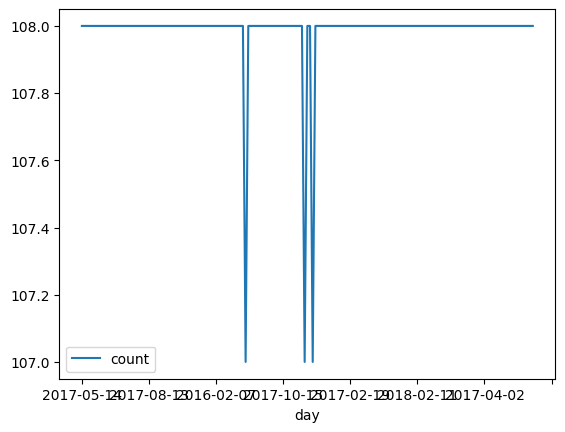

In [ ]:
avocado_pd.plot(x="day",y="count",kind="line")

In [ ]:
avocado_pd.sort_values(by='day', ascending = False, inplace = True)
avocado_pd

,day,count
148,2018-03-25,108
120,2018-03-18,108
76,2018-03-11,108
142,2018-03-04,108
122,2018-02-25,108
...,...,...
167,2015-02-01,108
140,2015-01-25,108
4,2015-01-18,108
99,2015-01-11,108


In [ ]:
import plotly.express as px

fig = px.line(avocado_pd, x='day', y='count')
fig.show()

#### By Year

In [ ]:
from pyspark.sql.functions import date_format

(
    avocado_df
    .groupBy("year")
    .count()
    .show(10)
)

+-------------------+-----+
|               year|count|
+-------------------+-----+
|2017-01-01 00:00:00| 5722|
|2018-01-01 00:00:00| 1296|
|2015-01-01 00:00:00| 5615|
|2016-01-01 00:00:00| 5616|
+-------------------+-----+



In [ ]:
avocado_year_pd = (
    avocado_df
    .groupBy("year")
    .count()
    .toPandas()
)

In [ ]:
avocado_year_pd.head()

,year,count
0,2017-01-01,5722
1,2018-01-01,1296
2,2015-01-01,5615
3,2016-01-01,5616


In [ ]:
# Plot a bar chart
fig = px.bar(avocado_year_pd, y="count", x="year")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import plotly.express as px

# Assuming 'avocado_year_pd' DataFrame has 'year' and 'count' columns
fig = px.pie(avocado_year_pd, names="year", values="count", title="Count by Year")
fig.update_layout(title_text="Count Distribution by Year")
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### By Region

In [ ]:
from pyspark.sql.functions import date_format

(
    avocado_df
    .groupBy("region")
    .count()
    .show(10)
)

+----------------+-----+
|          region|count|
+----------------+-----+
|   PhoenixTucson|  338|
|     GrandRapids|  338|
|   SouthCarolina|  338|
|         TotalUS|  338|
|WestTexNewMexico|  335|
|      Louisville|  338|
|    Philadelphia|  338|
|      Sacramento|  338|
|   DallasFtWorth|  338|
|    Indianapolis|  338|
+----------------+-----+
only showing top 10 rows



In [ ]:
avocado_region_pd = (
    avocado_df
    .groupBy("region")
    .count()
    .toPandas()
)

In [ ]:
avocado_region_pd.head()

,region,count
0,PhoenixTucson,338
1,GrandRapids,338
2,SouthCarolina,338
3,TotalUS,338
4,WestTexNewMexico,335


In [ ]:
# Plot a pie chart
fig = px.bar(avocado_region_pd, y="count", x="region")
fig.show()

In [ ]:
# Transaksi paling banyak belanja di mana dan type apa? (Dollar & Volume)
from pyspark.sql.functions import col, sum, round

(
    avocado_df
 .withColumn("total_price",col("AveragePrice")*col("Total Volume"))
 .groupBy("type","region")
 .agg(sum('total_price').alias("FullPrice"))
 .withColumn("FullPrice", round("FullPrice",2))
 .orderBy("FullPrice",ascending=False)
 .show(5)
)

+------------+------------+---------------+
|        type|      region|      FullPrice|
+------------+------------+---------------+
|conventional|     TotalUS|6.13453580696E9|
|conventional|  California|1.07963773054E9|
|conventional|        West|1.01171781752E9|
|conventional|   Northeast|  9.159935202E8|
|conventional|SouthCentral| 8.5052194672E8|
+------------+------------+---------------+
only showing top 5 rows



In [ ]:
# Collect data into Pandas DataFrame
result_df = (
    avocado_df
    .withColumn("total_price", col("AveragePrice") * col("Total Volume"))
    .groupBy("type", "region")
    .agg(sum('total_price').alias("FullPrice"))
    .withColumn("FullPrice", round("FullPrice", 2))
    .orderBy("FullPrice", ascending=False)
    .toPandas()
)


In [ ]:
import plotly.express as px

# Plot bar chart
fig_bar = px.bar(result_df, x="region", y="FullPrice", color="type",
                 title="Total Price by Region and Type")
fig_bar.update_xaxes(title="Region")
fig_bar.update_yaxes(title="Total Price")
fig_bar.show()


## Complex Statistics

In [ ]:
# Correlation

from pyspark.sql.functions import corr

# Calculate the correlation between 'Total Volume' and 'AveragePrice'
correlation_df = avocado_df.select(corr('Total Volume', 'AveragePrice').alias('correlation'))
correlation_df.show()

+--------------------+
|         correlation|
+--------------------+
|-0.19275238715272078|
+--------------------+



In [ ]:
# Standard Deviation

from pyspark.sql.functions import stddev

# Calculate the standard deviation of 'Total Volume'
stddev_df = avocado_df.select(stddev('Total Volume').alias('stddev_Total_Volume'))
stddev_df.show()

+-------------------+
|stddev_Total_Volume|
+-------------------+
| 3453545.3553994684|
+-------------------+



In [ ]:
# Summary Statistics (Mean, StdDev, Min, Max, etc.)

# Get summary statistics for numeric columns
avocado_df.describe(['Total Volume', 'AveragePrice']).show()

+-------+------------------+------------------+
|summary|      Total Volume|      AveragePrice|
+-------+------------------+------------------+
|  count|             18249|             18249|
|   mean| 850644.0130089332|1.4059784097758825|
| stddev|3453545.3553994684|0.4026765554955525|
|    min|             84.56|              0.44|
|    max|     6.250564652E7|              3.25|
+-------+------------------+------------------+



In [ ]:
# Get detailed summary statistics
avocado_df.summary('count', 'mean', 'stddev', 'min', '25%', '50%', '75%', 'max').show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------+----------------+------------------+
|summary|        Unnamed: 0|      AveragePrice|      Total Volume|              4046|              4225|              4770|        Total Bags|        Small Bags|        Large Bags|       XLarge Bags|        type|          region|       total_price|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------+----------------+------------------+
|  count|             18249|             18249|             18249|             18249|             18249|             18249|             18249|             18249|             18249|             18249|       18249|           18249|             18249|
|   

In [ ]:
# Covariance

from pyspark.sql.functions import covar_samp

# Calculate the covariance between 'Total Volume' and 'AveragePrice'
covariance_df = avocado_df.select(covar_samp('Total Volume', 'AveragePrice').alias('covariance'))
covariance_df.show()

+-------------------+
|         covariance|
+-------------------+
|-268053.37164125027|
+-------------------+



In [ ]:
# Correlation Matrix

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Prepare data for correlation matrix
vector_col = "features"
assembler = VectorAssembler(inputCols=["Total Volume", "AveragePrice"], outputCol=vector_col)
df_vector = assembler.transform(avocado_df).select(vector_col)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(df_vector, vector_col).head()[0]
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
 DenseMatrix([[ 1.        , -0.19275239],
             [-0.19275239,  1.        ]])
